# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

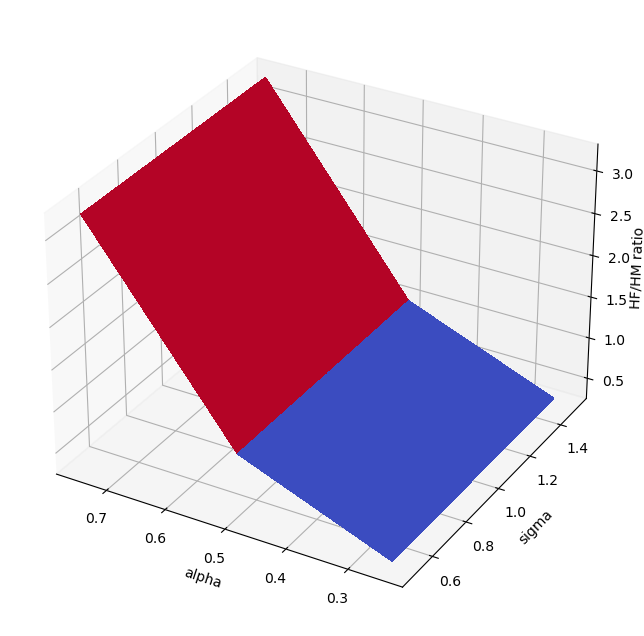

In [57]:

import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

alpha_range = np.array([0.25, 0.50, 0.75])
sigma_range = np.array([0.5, 1.0, 1.5])

# create meshgrid of alpha and sigma values
alpha, sigma = np.meshgrid(alpha_range, sigma_range)

# calculate HF/HM ratio for each combination of alpha and sigma
hf_hm_ratio = np.zeros_like(alpha)
for i in range(alpha.shape[0]):
    for j in range(alpha.shape[1]):
        # set alpha and sigma values for model instance
        model.par.alpha = alpha[i, j]
        model.par.sigma = sigma[i, j]
        # solve model and calculate HF/HM ratio
        opt = model.solve_discrete()
        hf_hm_ratio[i, j] = opt.HF / opt.HM

# plot the surface

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha, sigma, hf_hm_ratio,cmap=cm.coolwarm,linewidth=0,antialiased=False)

ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM ratio', rotation=90)

ax.invert_xaxis()
#show me the text on z axis
#make the graph wider so i can see the text on the z-axis
fig.set_size_inches(10, 8)
ax.zaxis.labelpad=-0.7
#make the graph wider
#rotate the graph
#ax.view_init(5, 88)




In [58]:
import numpy as np

# define alpha and sigma ranges
alpha_range = np.array([0.25, 0.50, 0.75])
sigma_range = np.array([0.5, 1.0, 1.5])

# create meshgrid of alpha and sigma values
alpha, sigma = np.meshgrid(alpha_range, sigma_range)

# calculate HF/HM ratio for each combination of alpha and sigma
hf_hm_ratio = np.zeros_like(alpha)
for i in range(alpha.shape[0]):
    for j in range(alpha.shape[1]):
        # set alpha and sigma values for model instance
        model.par.alpha = alpha[i, j]
        model.par.sigma = sigma[i, j]
        # solve model and calculate HF/HM ratio
        opt = model.solve_discrete()
        hf_hm_ratio[i, j] = opt.HF / opt.HM

# print table header
print("| alpha | sigma | HF/HM ratio |")
print("|-------|-------|-------------|")

# print table rows
for i in range(alpha_range.shape[0]):
    for j in range(sigma_range.shape[0]):
        print("|  {:.2f} |  {:.1f} |     {:.4f} |".format(alpha[i, j], sigma[i, j], hf_hm_ratio[i, j]))


| alpha | sigma | HF/HM ratio |
|-------|-------|-------------|
|  0.25 |  0.5 |     0.3077 |
|  0.50 |  0.5 |     1.0000 |
|  0.75 |  0.5 |     3.2500 |
|  0.25 |  1.0 |     0.3077 |
|  0.50 |  1.0 |     1.0000 |
|  0.75 |  1.0 |     3.2500 |
|  0.25 |  1.5 |     0.3077 |
|  0.50 |  1.5 |     1.0000 |
|  0.75 |  1.5 |     3.2500 |


# Question 2

Explain your code and procedure

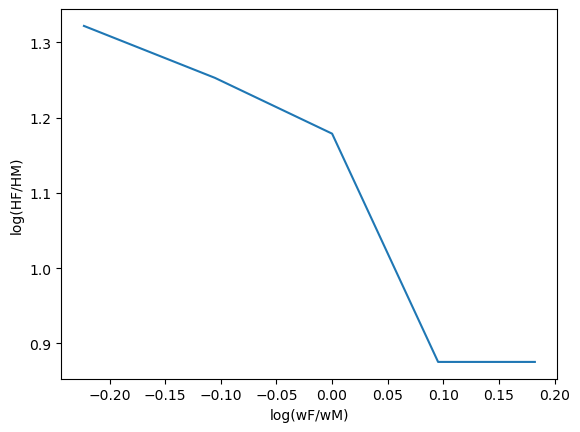

In [59]:
# solve for each wF value
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# calculate HF/HM
HF_HM = model.sol.HF_vec / model.sol.HM_vec

# plot log(HF/HM) against log(wF/wM)
plt.plot(np.log(model.par.wF_vec/model.par.wM), np.log(HF_HM))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()


# Question 3

Explain your code and procedure

In [62]:
import HouseholdSpecializationModel2
model = HouseholdSpecializationModel2.HouseholdSpecializationModelClass2()

# solve for each wF value
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# calculate HF/HM
HF_HM = model.sol.HF_vec / model.sol.HM_vec

# plot log(HF/HM) against log(wF/wM)
plt.plot(np.log(model.par.wF_vec/model.par.wM), np.log(HF_HM))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()


ModuleNotFoundError: No module named 'HouseholdSpecializationModel2'

ADD CONCISE CONLUSION.